<a href="https://colab.research.google.com/github/omkarsachdeva/django/blob/master/Copy_of_Smart_Disease_Prediction_System_Using_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
pdata = pd.read_csv('parkinsons1.csv')

In [ ]:
#print first 5 frames
pdata.head()

,name,MDVP-Fo(Hz),MDVP-Fhi(Hz),MDVP-Flo(Hz),MDVP-Jitter(%),MDVP-Jitter(Abs),MDVP-RAP,MDVP-PPQ,Jitter-DDP,MDVP-Shimmer,...,Shimmer-DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#print last 5 frames
pdata.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
#total shape
print(pdata.shape)

(195, 24)


In [ ]:
# getting more information about the dataset
print(pdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP-Fo(Hz)       195 non-null    float64
 2   MDVP-Fhi(Hz)      195 non-null    float64
 3   MDVP-Flo(Hz)      195 non-null    float64
 4   MDVP-Jitter(%)    195 non-null    float64
 5   MDVP-Jitter(Abs)  195 non-null    float64
 6   MDVP-RAP          195 non-null    float64
 7   MDVP-PPQ          195 non-null    float64
 8   Jitter-DDP        195 non-null    float64
 9   MDVP-Shimmer      195 non-null    float64
 10  MDVP-Shimmer(dB)  195 non-null    float64
 11  Shimmer-APQ3      195 non-null    float64
 12  Shimmer-APQ5      195 non-null    float64
 13  MDVP-APQ          195 non-null    float64
 14  Shimmer-DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# Check for null values
if pdata.isnull().sum().any():
    print("Data contains null values")
else:
    print("Data does not contain null values")


Data does not contain null values


NO NULL VALUES PRESENT

In [ ]:
#check null value in any column
print(pdata.isnull().sum())

name                0
MDVP-Fo(Hz)         0
MDVP-Fhi(Hz)        0
MDVP-Flo(Hz)        0
MDVP-Jitter(%)      0
MDVP-Jitter(Abs)    0
MDVP-RAP            0
MDVP-PPQ            0
Jitter-DDP          0
MDVP-Shimmer        0
MDVP-Shimmer(dB)    0
Shimmer-APQ3        0
Shimmer-APQ5        0
MDVP-APQ            0
Shimmer-DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [ ]:
#describing the data
pdata.describe()

,MDVP-Fo(Hz),MDVP-Fhi(Hz),MDVP-Flo(Hz),MDVP-Jitter(%),MDVP-Jitter(Abs),MDVP-RAP,MDVP-PPQ,Jitter-DDP,MDVP-Shimmer,MDVP-Shimmer(dB),...,Shimmer-DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Feature Extraction

In [ ]:
#to check target variable --> 'Status' whether patient is diagnosed with disease or not
target_variable = "status"
pdata[target_variable].value_counts()

,count
status,
1,147
0,48


STATUS

1 - Diagnosed with parkinson

0 - Healthy

MODULE 2

VISUALISATION

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

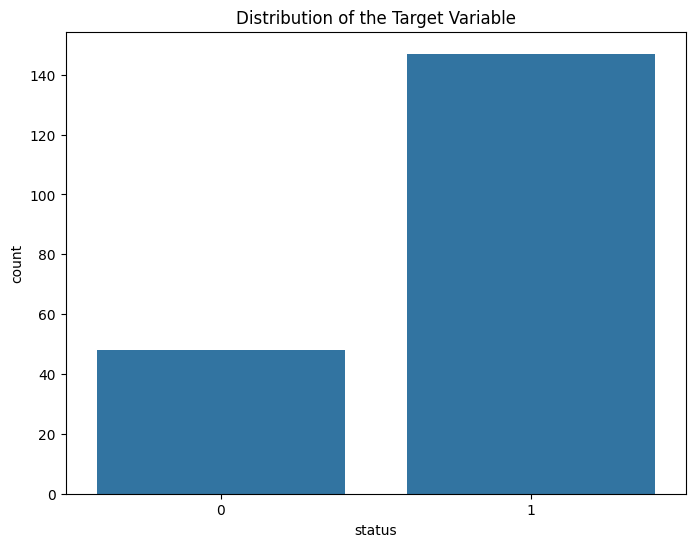

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=pdata)
plt.title('Distribution of the Target Variable')
plt.show()

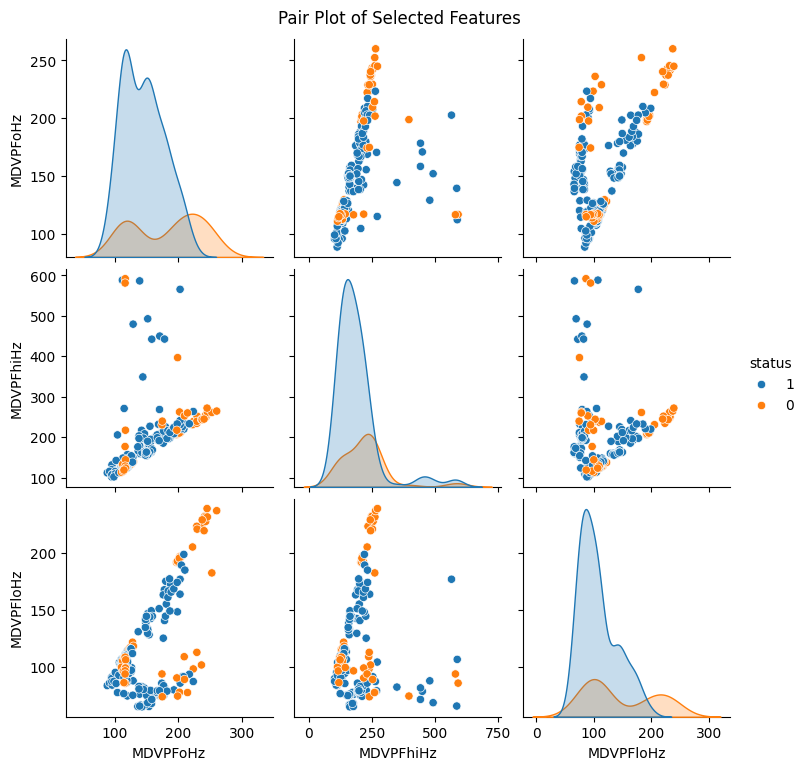

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'pdata' is a DataFrame
if not isinstance(pdata, pd.DataFrame):
    pdata = pd.DataFrame(pdata)

# Check and clean column names
pdata.columns = pdata.columns.str.strip()  # Remove extra spaces
pdata.columns = pdata.columns.str.replace(r"[^\w\s]", "", regex=True)  # Remove special characters

# Define the correct column names (after cleaning)
columns_to_plot = ['MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'status']  # Adjusted after removing special characters

# Ensure all columns exist in pdata
missing_columns = [col for col in columns_to_plot if col not in pdata.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Ensure 'status' is categorical for hue
    pdata['status'] = pdata['status'].astype(str)

    # Pair plot
    sns.pairplot(pdata[columns_to_plot], hue='status', diag_kind='kde')

    # Title
    plt.suptitle('Pair Plot of Selected Features', y=1.02)

    # Show plot
    plt.show()



Available columns: Index(['name', 'MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter',
       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP', 'MDVPShimmer',
       'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5', 'MDVPAPQ', 'ShimmerDDA',
       'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')


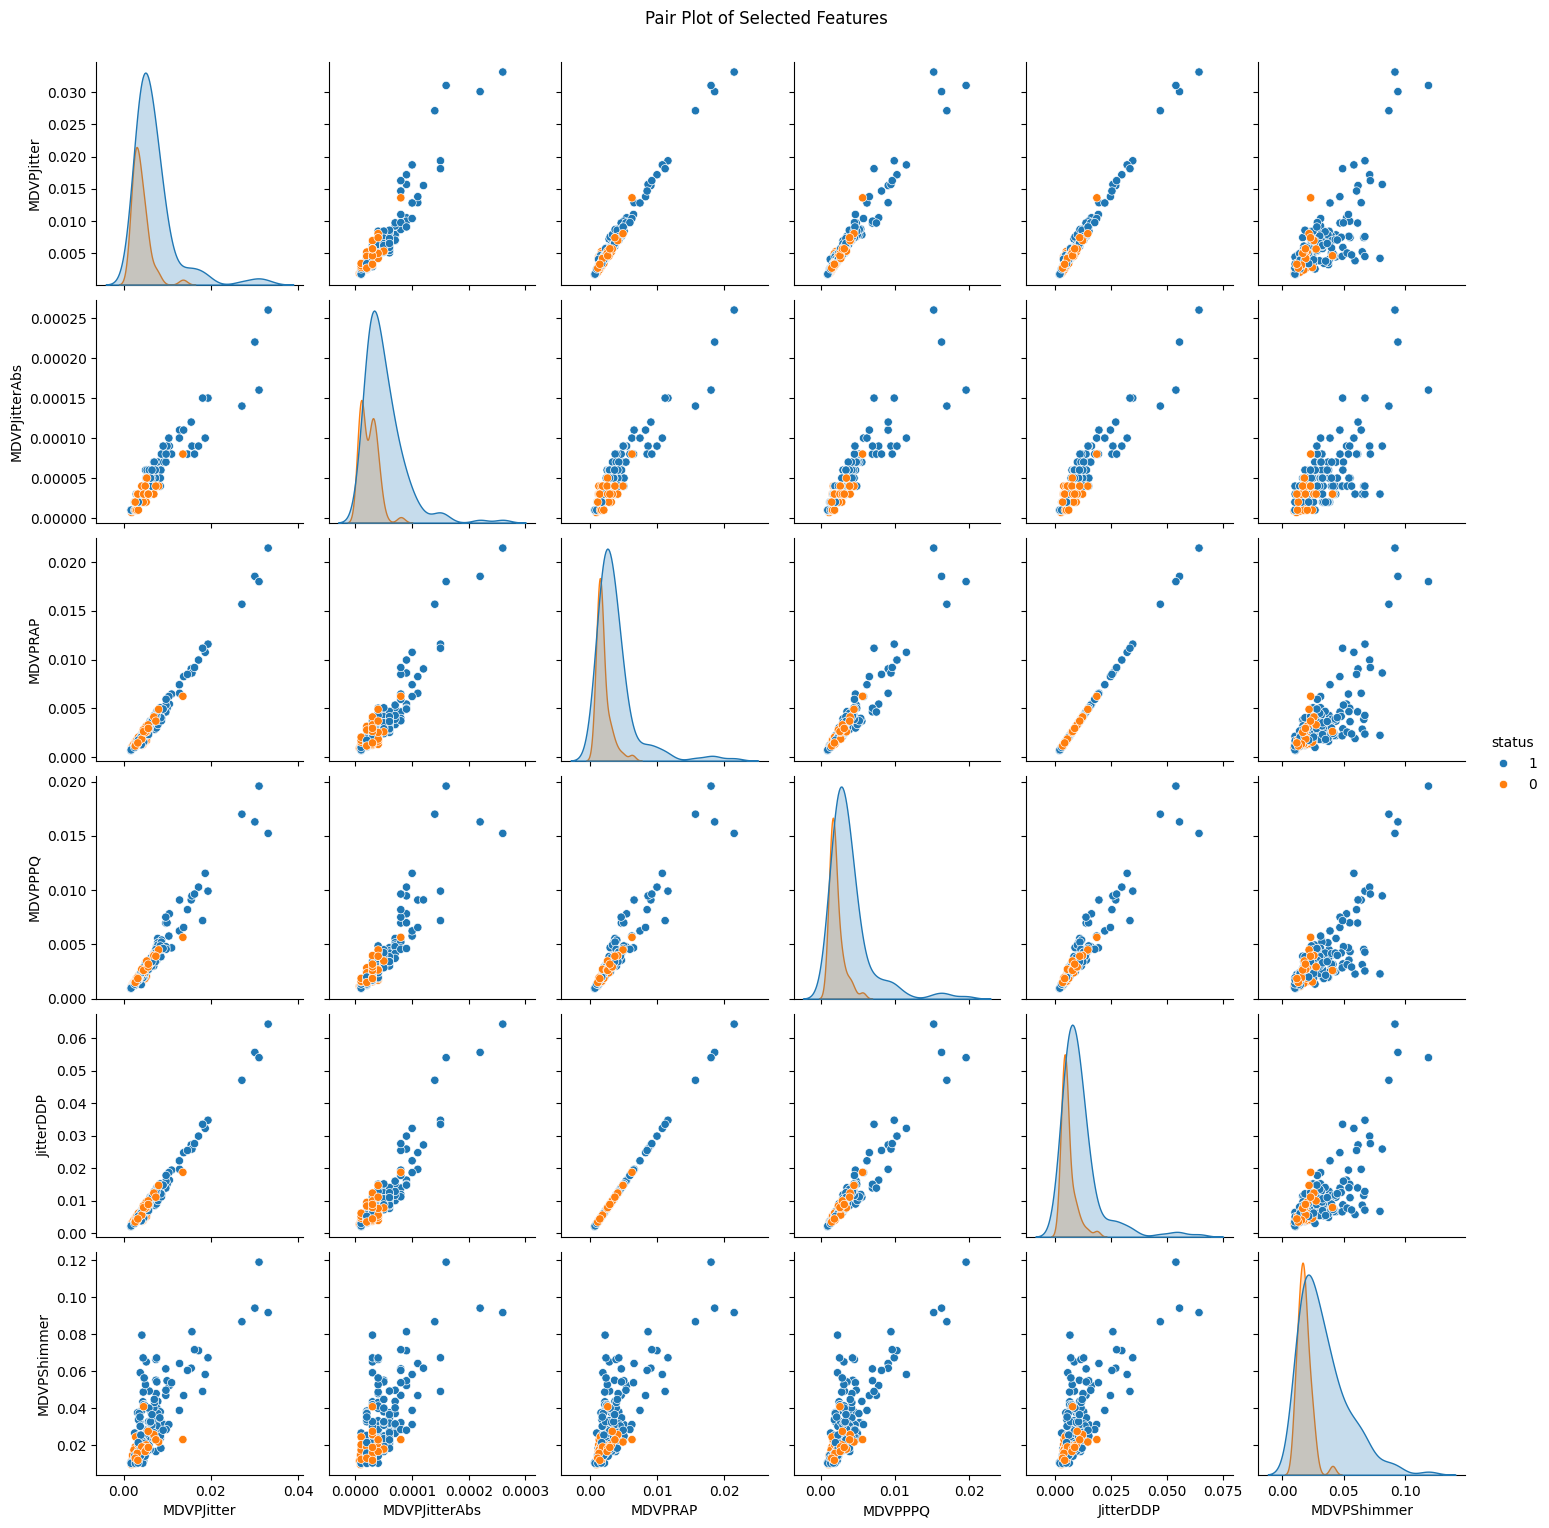

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (Ensure the dataset is correctly loaded)
# pdata = pd.read_csv("your_file.csv")  # Uncomment and replace with your file path

# Print available column names for reference
print("Available columns:", pdata.columns)

# Use correct column names based on pdata.columns
columns_to_plot = [
    'MDVPJitter', 'MDVPJitterAbs', 'MDVPRAP',
    'MDVPPPQ', 'JitterDDP', 'MDVPShimmer', 'status'
]

# Ensure the selected columns exist in the DataFrame
missing_cols = [col for col in columns_to_plot if col not in pdata.columns]
if missing_cols:
    raise KeyError(f"The following columns are missing: {missing_cols}")

# Create pair plot
sns.pairplot(pdata[columns_to_plot], hue='status', diag_kind='kde')

# Title adjustment
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


**MODULE 3**

Separating Features and Target

In [ ]:
#separating feature and target

X = pdata.drop(columns=['name','status'], axis=1)
Y = pdata['status']

In [ ]:
print(X)

     MDVPFoHz  MDVPFhiHz  MDVPFloHz  MDVPJitter  MDVPJitterAbs  MDVPRAP  \
0     119.992    157.302     74.997     0.00784        0.00007  0.00370   
1     122.400    148.650    113.819     0.00968        0.00008  0.00465   
2     116.682    131.111    111.555     0.01050        0.00009  0.00544   
3     116.676    137.871    111.366     0.00997        0.00009  0.00502   
4     116.014    141.781    110.655     0.01284        0.00011  0.00655   
..        ...        ...        ...         ...            ...      ...   
190   174.188    230.978     94.261     0.00459        0.00003  0.00263   
191   209.516    253.017     89.488     0.00564        0.00003  0.00331   
192   174.688    240.005     74.287     0.01360        0.00008  0.00624   
193   198.764    396.961     74.904     0.00740        0.00004  0.00370   
194   214.289    260.277     77.973     0.00567        0.00003  0.00295   

     MDVPPPQ  JitterDDP  MDVPShimmer  MDVPShimmerdB  ...  MDVPAPQ  ShimmerDDA  \
0    0.00554    0.

# New Section

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: object


**MODULE 3**

Splitting data to Training and Testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)   #for each Y X is trained tested and predicted .. so if Y=0/1 X would be tested based on its data

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
print(Y.shape, Y_train.shape,Y_test.shape)

(195,) (156,) (39,)


In [ ]:
#MODEL TRAINING

LOGISTIC REGRESSION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
log_reg = LogisticRegression(max_iter=10000)
svm=SVC(probability=True)

**Creating Ensemble Model**

In [ ]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('svc', svm)], voting='soft')


**Training the Ensemble Model**

In [ ]:
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [ ]:
test_pred = voting_clf.predict(X_test)
train_pred = voting_clf.predict(X_train)

In [ ]:
print("Training Accuracy:", accuracy_score(Y_train, train_pred))
print("Testing Accuracy:", accuracy_score(Y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, test_pred))

Training Accuracy: 0.8717948717948718
Testing Accuracy: 0.8717948717948718
Confusion Matrix:
 [[ 4  4]
 [ 1 30]]


**Input Data for Prediction**

Building a predictive system

In [ ]:
# Input data for prediction
input_data = (197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 1.743867, 0.085569)

# Changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making a prediction
prediction = voting_clf.predict(input_data_reshaped)
print(prediction)

# Interpreting the prediction result
if (prediction[0] == 0):
    print("The Person does not have Parkinson's Disease")
else:
    print("The Person has Parkinson's Disease")


['0']
The Person has Parkinson's Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Save the trained model

In [ ]:
import pickle

In [ ]:
filename = 'smartdiseaseprediction_ensemble.sav'
pickle.dump(log_reg,open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('smartdiseaseprediction_ensemble.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

MDVPFoHz
MDVPFhiHz
MDVPFloHz
MDVPJitter
MDVPJitterAbs
MDVPRAP
MDVPPPQ
JitterDDP
MDVPShimmer
MDVPShimmerdB
ShimmerAPQ3
ShimmerAPQ5
MDVPAPQ
ShimmerDDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
